# Step #1 Load the Data

In [1]:
import math 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, f1_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

# The Data can be downloaded from Kaggle.com: https://www.kaggle.com/mlg-ulb/creditcardfraud?select=creditcard.csv
path = 'data/credit-card-transactions/'
df = pd.read_csv(f'{path}creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Step #2 Data Exploration

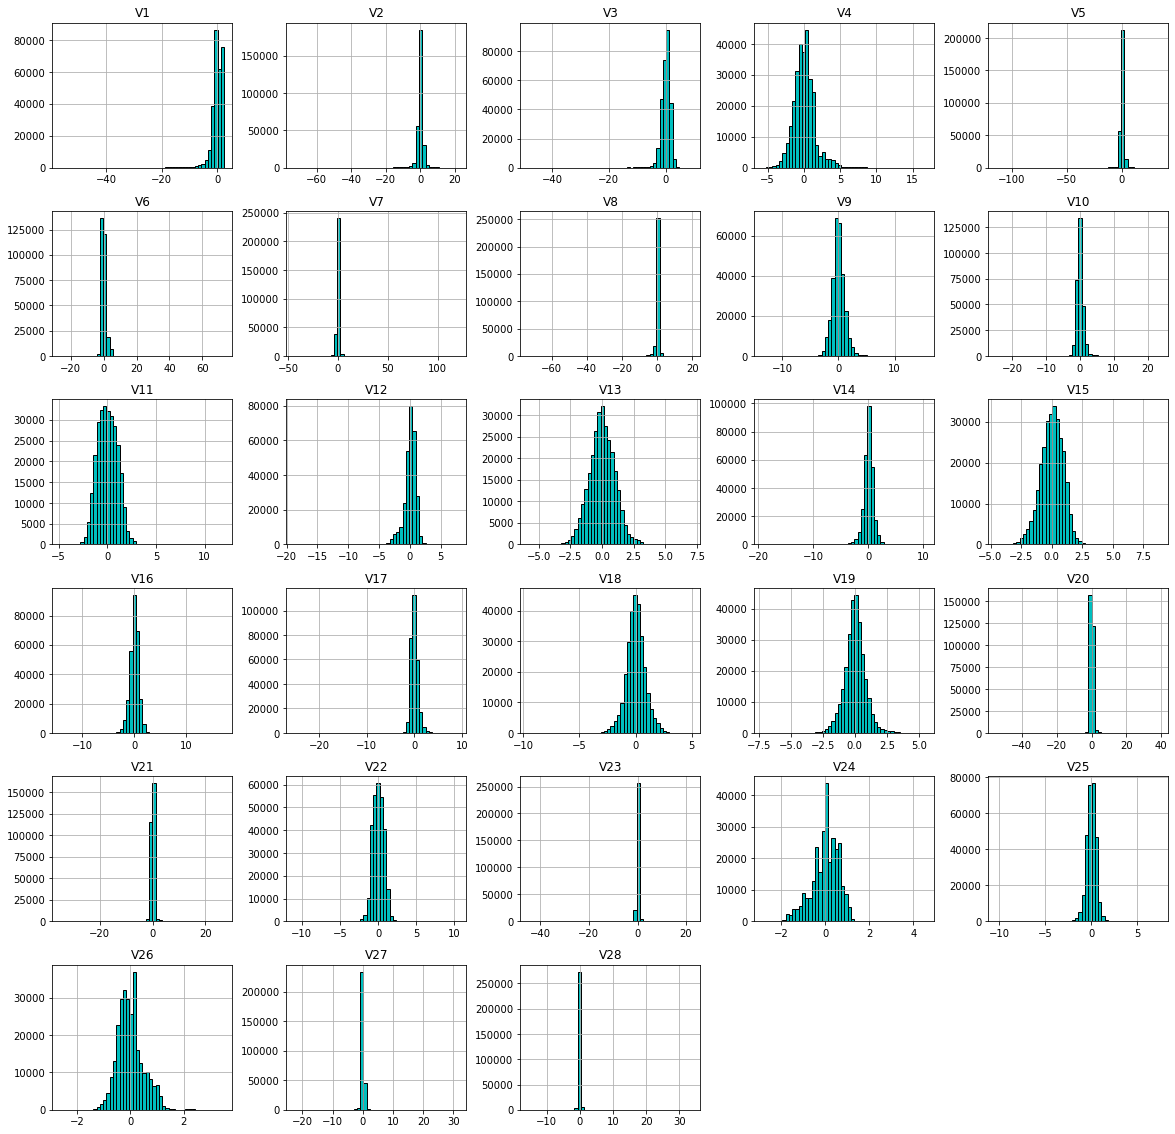

In [2]:
# create histograms on all features
df_hist = df.drop(['Time','Amount', 'Class'], 1)
df_hist.hist(figsize=(20,20), bins = 50, color = "c", edgecolor='black')
plt.show()

<AxesSubplot:>

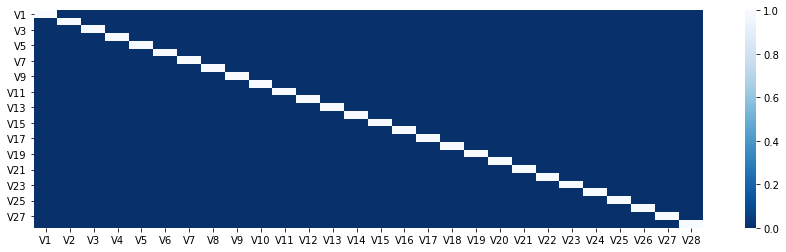

In [3]:
# feature correlation
plt.figure(figsize=(15,4))
f_cor = df_hist.corr()
sns.heatmap(f_cor, cmap="Blues_r")

0 = nominal transactions, 1 = fraud
0    284315
1       492
Name: Class, dtype: int64


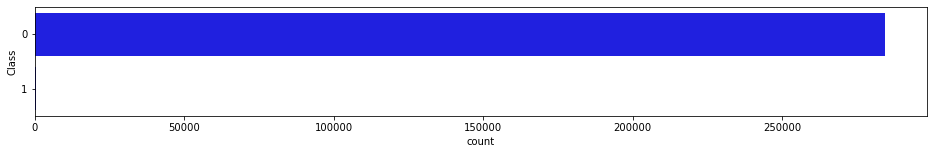

0.0017304750013189597


In [4]:
# Plot the balance of class labels
df_base = df.copy()

print('0 = nominal transactions, 1 = fraud')
value_counts = df_base['Class'].value_counts()
print(value_counts)

plt.figure(figsize=(16,2))
fig = sns.countplot(y="Class", data=df_base, color='b')
plt.show()

contamination_rate = value_counts[1]/value_counts[0]
print(contamination_rate)

<Figure size 1440x288 with 0 Axes>

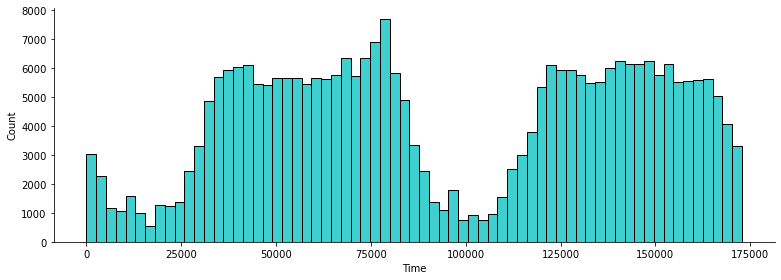

In [5]:
# Plot istribution of the Time variable, which contains transaction data for two days
plt.figure(figsize=(20,4))
fig = sns.displot(df_base['Time'], kde=False, color="c", height=4, aspect=11.7/4.27)
plt.show()

Text(0.5, 0.98, 'Transaction Amount over Time split by Class')

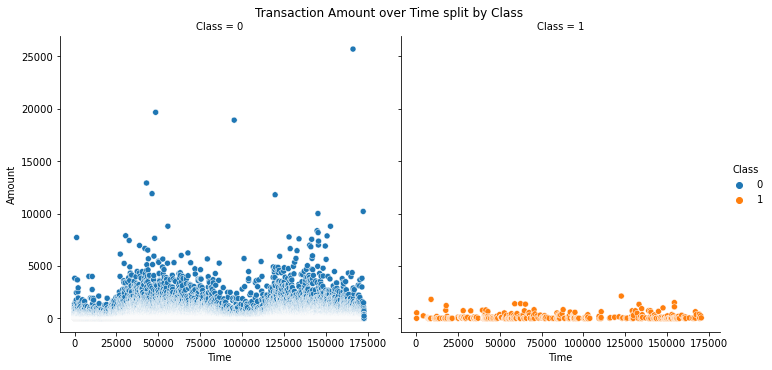

In [6]:
# Plot time against amount
x = df_base['Time']
y = df_base['Amount']
rp = sns.relplot(data=df_base, x=x, y=y, col="Class", kind="scatter", hue="Class")
rp.fig.subplots_adjust(top=0.9)
rp.fig.suptitle('Transaction Amount over Time split by Class')

# Step #3 Data Preprocessing

In [7]:
# Separate the classes from the train set
df_classes = df_base['Class']
df_train = df_base.drop(['Class'], axis=1)

# split the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(df_train, df_classes, test_size=0.30, random_state=42)

# Step #4 Train Models

# 4.1 Isolation Forest

In [8]:
# train the model on the nominal train set
model_isf = IsolationForest().fit(X_train)

Isolation Forest (baseline) model
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     82095
           1       0.85      0.03      0.07      3348

    accuracy                           0.96     85443
   macro avg       0.90      0.52      0.52     85443
weighted avg       0.96      0.96      0.94     85443

f1_score: 52.33%


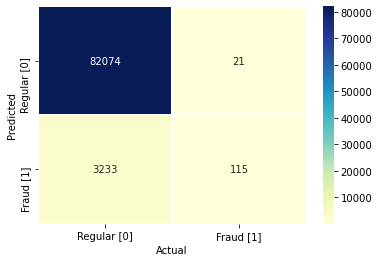

In [9]:
def measure_performance(model, X_test, y_true, map_labels):
    # predict on testset
    df_pred_test = X_test.copy()
    #df_pred_test['Class'] = y_test
    df_pred_test['Pred'] = model.predict(X_test)
    if map_labels:
        df_pred_test['Pred'] = df_pred_test['Pred'].map({1: 0, -1: 1})
    #df_pred_test['Outlier_Score'] = model.decision_function(X_test)

    # measure performance
    #y_true = df_pred_test['Class']
    x_pred = df_pred_test['Pred'] 
    matrix = confusion_matrix(x_pred, y_true)

    sns.heatmap(pd.DataFrame(matrix, columns = ['Actual', 'Predicted']),
                xticklabels=['Regular [0]', 'Fraud [1]'], 
                yticklabels=['Regular [0]', 'Fraud [1]'], 
                annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    
    print(classification_report(x_pred, y_true))
    
    model_score = score(x_pred, y_true,average='macro')
    print(f'f1_score: {np.round(model_score[2]*100, 2)}%')
    
    return model_score

model_name = 'Isolation Forest (baseline)'
print(f'{model_name} model')

map_labels = True
model_score = measure_performance(model_isf, X_test, y_test, map_labels)

performance_df = pd.DataFrame().append({'model_name':model_name, 
                                    'f1_score': model_score[0], 
                                    'precision': model_score[1], 
                                    'recall': model_score[2]}, ignore_index=True)

Best: [0.00091959 0.00087605 0.00098646 0.00085272 0.00097965 0.00087938], using {'bootstrap': True, 'max_features': 5, 'n_estimators': 50}
Isolation Forest (tuned) model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85304
           1       0.37      0.36      0.36       139

    accuracy                           1.00     85443
   macro avg       0.68      0.68      0.68     85443
weighted avg       1.00      1.00      1.00     85443

f1_score: 68.13%


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,3.470876,1.112862,0.977335,0.027257,True,1.0,50,"{'bootstrap': True, 'max_features': 1.0, 'n_es...",0.000823,0.000923,0.001013,0.000920,0.000078,3
1,5.075296,0.073721,1.899181,0.015837,True,1.0,100,"{'bootstrap': True, 'max_features': 1.0, 'n_es...",0.000873,0.000883,0.000873,0.000876,0.000005,5
2,1.821636,0.073169,0.644334,0.012362,True,5,50,"{'bootstrap': True, 'max_features': 5, 'n_esti...",0.000953,0.000933,0.001073,0.000986,0.000062,1
3,3.189440,0.057030,1.289333,0.008805,True,5,100,"{'bootstrap': True, 'max_features': 5, 'n_esti...",0.000873,0.000873,0.000813,0.000853,0.000028,6
4,2.106431,0.025499,0.750333,0.006848,True,10,50,"{'bootstrap': True, 'max_features': 10, 'n_est...",0.000993,0.000913,0.001033,0.000980,0.000050,2
5,3.671138,0.060553,1.477998,0.019511,True,10,100,"{'bootstrap': True, 'max_features': 10, 'n_est...",0.000873,0.000843,0.000923,0.000879,0.000033,4


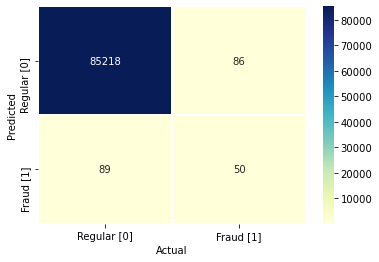

In [10]:
# Define the parameter grid
n_estimators=[50, 100]
max_features=[1.0, 5, 10]
bootstrap=[True]
param_grid = dict(n_estimators=n_estimators, max_features=max_features, bootstrap=bootstrap)

# Build the gridsearch
model_isf = IsolationForest(n_estimators=n_estimators, 
                            max_features=max_features, 
                            contamination=contamination_rate, 
                            bootstrap=False, 
                            n_jobs=-1)

# Define an f1_scorer
f1sc = make_scorer(f1_score, average='macro')

grid = GridSearchCV(estimator=model_isf, param_grid=param_grid, cv = 3, scoring=f1sc)
grid_results = grid.fit(X=X_train, y=y_train)

# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))
results_df = pd.DataFrame(grid_results.cv_results_)

# Evaluate model performance
model_name = 'Isolation Forest (tuned)'
print(f'{model_name} model')

best_model = grid_results.best_estimator_
map_labels = True # if True - maps 1 to 0 and -1 to 1 - not required for scikit-learn knn models
model_score = measure_performance(best_model, X_test, y_test, map_labels)
performance_df = performance_df.append({'model_name':model_name, 
                                    'f1_score': model_score[0], 
                                    'precision': model_score[1], 
                                    'recall': model_score[2]}, ignore_index=True)
results_df

# 4.2 Local Outlier Factor

LOF (baseline) model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85300
           1       0.07      0.07      0.07       143

    accuracy                           1.00     85443
   macro avg       0.54      0.53      0.54     85443
weighted avg       1.00      1.00      1.00     85443

f1_score: 53.51%


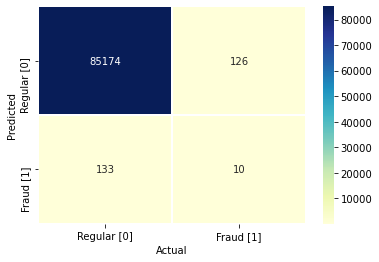

In [11]:
# Train a tuned local outlier factor model
model_lof = LocalOutlierFactor(n_neighbors=3, contamination=contamination_rate, novelty=True)
model_lof.fit(X_train)

# Evaluate model performance
model_name = 'LOF (baseline)'
print(f'{model_name} model')

map_labels = True 
model_score = measure_performance(model_lof, X_test, y_test, map_labels)
performance_df = performance_df.append({'model_name':model_name, 
                                    'f1_score': model_score[0], 
                                    'precision': model_score[1], 
                                    'recall': model_score[2]}, ignore_index=True)

# 4.3 K-Means

KNN (baseline) model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85437
           1       0.04      1.00      0.08         6

    accuracy                           1.00     85443
   macro avg       0.52      1.00      0.54     85443
weighted avg       1.00      1.00      1.00     85443

f1_score: 54.19%


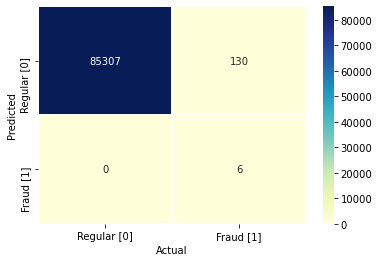

In [12]:
# Train a KNN Model
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X=X_train, y=y_train)

# Evaluate model performance
model_name = 'KNN (baseline)'
print(f'{model_name} model')

map_labels = False # if True - maps 1 to 0 and -1 to 1 - set to False for classification models (e.g., KNN)
model_score = measure_performance(model_knn, X_test, y_test, map_labels)
performance_df = performance_df.append({'model_name':model_name, 
                                    'f1_score': model_score[0], 
                                    'precision': model_score[1], 
                                    'recall': model_score[2]}, ignore_index=True)

Best: [0.61083219 0.55718259 0.55912644 0.52670328 0.5317127 ], using {'n_neighbors': 1}
KNN (tuned) model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85385
           1       0.21      0.48      0.29        58

    accuracy                           1.00     85443
   macro avg       0.60      0.74      0.64     85443
weighted avg       1.00      1.00      1.00     85443

f1_score: 64.39%


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.452000,0.016516,1.168000,0.003846,1,{'n_neighbors': 1},0.629535,0.611768,0.583553,0.585538,0.643766,0.610832,0.023746,1
1,1.550799,0.105343,1.264400,0.038521,2,{'n_neighbors': 2},0.589342,0.540114,0.565375,0.539567,0.551515,0.557183,0.018629,3
2,1.470722,0.027560,1.247400,0.007787,3,{'n_neighbors': 3},0.589342,0.552205,0.563676,0.539567,0.550843,0.559126,0.016928,2
3,1.476305,0.025637,1.337902,0.059603,4,{'n_neighbors': 4},0.526964,0.526964,0.540114,0.513253,0.526221,0.526703,0.008498,5
4,1.478643,0.016857,1.304400,0.005986,5,{'n_neighbors': 5},0.539567,0.540114,0.540114,0.513253,0.525516,0.531713,0.010789,4


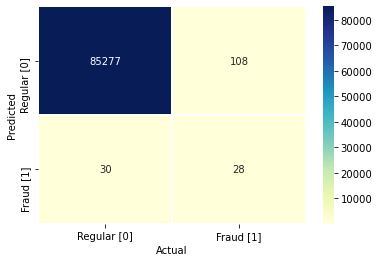

In [13]:
# Define hypertuning parameters
n_neighbors=[1, 2, 3, 4, 5]
param_grid = dict(n_neighbors=n_neighbors)

# Build the gridsearch
model_knn = KNeighborsClassifier(n_neighbors=n_neighbors)
grid = GridSearchCV(estimator=model_knn, param_grid=param_grid, cv = 5, scoring=f1sc)
grid_results = grid.fit(X=X_train, y=y_train)

# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))
results_df = pd.DataFrame(grid_results.cv_results_)

# Evaluate model performance
model_name = 'KNN (tuned)'
print(f'{model_name} model')

best_model = grid_results.best_estimator_
map_labels = False # if True - maps 1 to 0 and -1 to 1 - set to False for classification models (e.g., KNN)
model_score = measure_performance(best_model, X_test, y_test, map_labels)
performance_df = performance_df.append({'model_name':model_name, 
                                    'f1_score': model_score[0], 
                                    'precision': model_score[1], 
                                    'recall': model_score[2]}, ignore_index=True)
results_df

# Step #5 Comparing Model Performance

   f1_score                   model_name  precision    recall
0  0.903845  Isolation Forest (baseline)   0.517047  0.523289
1  0.683302     Isolation Forest (tuned)   0.679352  0.681305
2  0.535985               LOF (baseline)   0.534226  0.535083
3  0.522059               KNN (baseline)   0.999239  0.541873
4  0.602765                  KNN (tuned)   0.740747  0.643926


Text(0.5, 1.0, 'Model Outlier Detection Performance (Macro)')

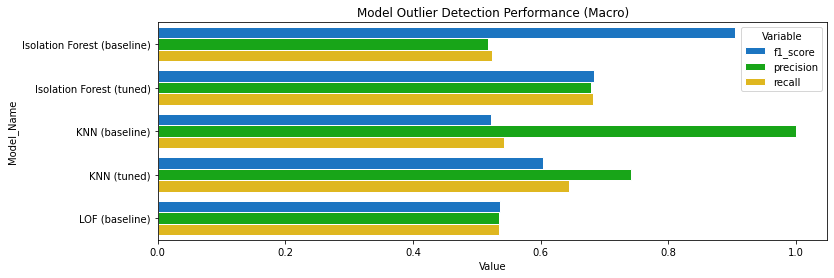

In [14]:
print(performance_df)

performance_df = performance_df.sort_values('model_name')

fig, ax = plt.subplots(figsize=(12, 4))
tidy = performance_df.melt(id_vars='model_name').rename(columns=str.title)
sns.barplot(y='Model_Name', x='Value', hue='Variable', data=tidy, ax=ax, palette='nipy_spectral', linewidth=1, edgecolor="w")
plt.title('Model Outlier Detection Performance (Macro)')